In [7]:
#sciezka z danymi
%cd "C:\Users\Dawid\Desktop\kurs\jdszr4-animalsi\wino"

C:\Users\Dawid\Desktop\kurs\jdszr4-animalsi\wino


In [90]:
from sklearn.metrics import *
import pickle
import matplotlib.pyplot as plt
#wlasny modul
from dane.dane_wsadowe_zmiana_klas import *

**1. Pobranie modeli**

In [9]:
#random forrest
with open("modele/model_final_rf.pkl", "rb") as file:
    model_rf = pickle.load(file)

In [10]:
#XGboost
with open("modele/model_final_xgb.pkl", "rb") as file:
    model_xgb = pickle.load(file)

In [88]:
#knn
with open("modele/Wine_Quality_Model_KNN.pkl", "rb") as file:
    model_knn = pickle.load(file)
    

In [12]:
#logistic regression
with open("modele/model_logreg.pkl", "rb") as file:
    model_lr= pickle.load(file)

**2. Trenowanie wszystkich modeli**

In [40]:
lista_modeli = [model_rf, model_xgb,model_lr]

#model_knn trzeba inaczej porownac

#progi na ktorych dzialaja najlepiej
progi = {"RandomForestClassifier" : 0.45862068965517244,
        "XGBClassifier" : 0.3206896551724138,
         "LogisticRegression": 0.5}

#jakie zbiory wykorzystalismy do trenowania
zbior = {"RandomForestClassifier" : X_test,
        "XGBClassifier" :X_test_scaled,
        "LogisticRegression": X_test}


In [35]:
for i in lista_modeli:
    prog = progi[type(i).__name__]
    dane = zbior[type(i).__name__]
    Y_pred_model = (i.predict_proba(dane)[:,1] >= prog).astype(int)+1
    cnf_matrix = confusion_matrix(Y_test, Y_pred_model)
    cnf_raport = classification_report(Y_test, Y_pred_model)
    print(type(i).__name__, "\n", cnf_raport)    

RandomForestClassifier 
               precision    recall  f1-score   support

           1       0.96      0.91      0.93       280
           2       0.53      0.70      0.60        40

    accuracy                           0.88       320
   macro avg       0.74      0.81      0.77       320
weighted avg       0.90      0.88      0.89       320

XGBClassifier 
               precision    recall  f1-score   support

           1       0.95      0.95      0.95       280
           2       0.66      0.62      0.64        40

    accuracy                           0.91       320
   macro avg       0.80      0.79      0.80       320
weighted avg       0.91      0.91      0.91       320

LogisticRegression 
               precision    recall  f1-score   support

           1       0.89      0.96      0.93       280
           2       0.44      0.20      0.28        40

    accuracy                           0.87       320
   macro avg       0.67      0.58      0.60       320
weighted avg

In [91]:
#model KNN został wyliczony na danych bez zmiennej pH

X_bez_pH = np.delete(X_test_scaled, 8,axis=1)

Y_pred_model_knn = model_knn.predict(X_bez_pH)
cnf_matrix_knn = confusion_matrix(Y_test, Y_pred_model_knn)
cnf_raport_knn = classification_report(Y_test, Y_pred_model_knn)
print(cnf_raport_knn)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.10      0.01      0.02       280
           2       0.00      0.00      0.00        40

    accuracy                           0.01       320
   macro avg       0.03      0.00      0.01       320
weighted avg       0.09      0.01      0.02       320



C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0, 1], dtype=int64)

In [79]:
X_bez_pH

array([[ 1.63500243,  0.74281416, -0.14204232, ...,  1.34018481,
         0.36181197,  0.50338642],
       [-0.34866796,  0.79935428, -0.19310877, ..., -0.27033963,
        -1.04575508, -0.87764578],
       [-0.06528648, -1.6318711 ,  0.36862222, ...,  0.35308919,
         1.65208177,  0.4113176 ],
       ...,
       [ 0.3881239 ,  1.64745616, -0.65270686, ...,  0.8726132 ,
        -0.16602568, -0.60143934],
       [-0.17863907, -0.55760872,  0.47075512, ...,  0.45699399,
        -1.16305234, -0.96971459],
       [-0.63204945,  0.06433266,  0.01115704, ..., -0.16643483,
         0.30316334,  0.50338642]])

In [71]:
pd.DataFrame({"zmienna" :X.columns,"wartosci" : X_train_all_scaled})

ValueError: Data must be 1-dimensional

In [76]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [77]:
pd.DataFrame(X_train_all_scaled, columns = X.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.635002,0.742814,-0.142042,-0.016322,-0.052665,0.044694,0.258784,1.340185,-1.628908,0.361812,0.503386
1,-0.348668,0.799354,-0.193109,-0.306815,0.010424,0.144824,1.656036,-0.270340,0.046733,-1.045755,-0.877646
2,-0.065286,-1.631871,0.368622,1.871883,-0.536352,-0.756348,-0.748538,0.353089,-0.597744,1.652082,0.411318
3,-0.915431,0.629734,-0.193109,-0.306815,-0.157815,-0.455957,2.403404,-0.696349,0.304525,0.244515,0.411318
4,-0.802078,-0.670689,0.215423,-0.379438,-0.178844,0.545345,0.193795,-0.020968,1.013450,-0.635215,-0.877646
...,...,...,...,...,...,...,...,...,...,...,...
1272,-0.178639,0.629734,-0.244175,-0.088945,0.136604,-1.056738,-0.391102,-0.311902,0.368972,-0.459269,0.503386
1273,1.748355,-0.387988,1.185685,0.128925,0.725440,-1.156869,-0.911010,2.015566,-1.177774,0.244515,-0.233164
1274,0.388124,1.647456,-0.652707,0.056301,0.031454,-0.656218,-0.716044,0.872613,0.497868,-0.166026,-0.601439
1275,-0.178639,-0.557609,0.470755,-0.161568,-0.262964,-0.556087,0.096312,0.456994,0.175629,-1.163052,-0.969715


RandomForestClassifier


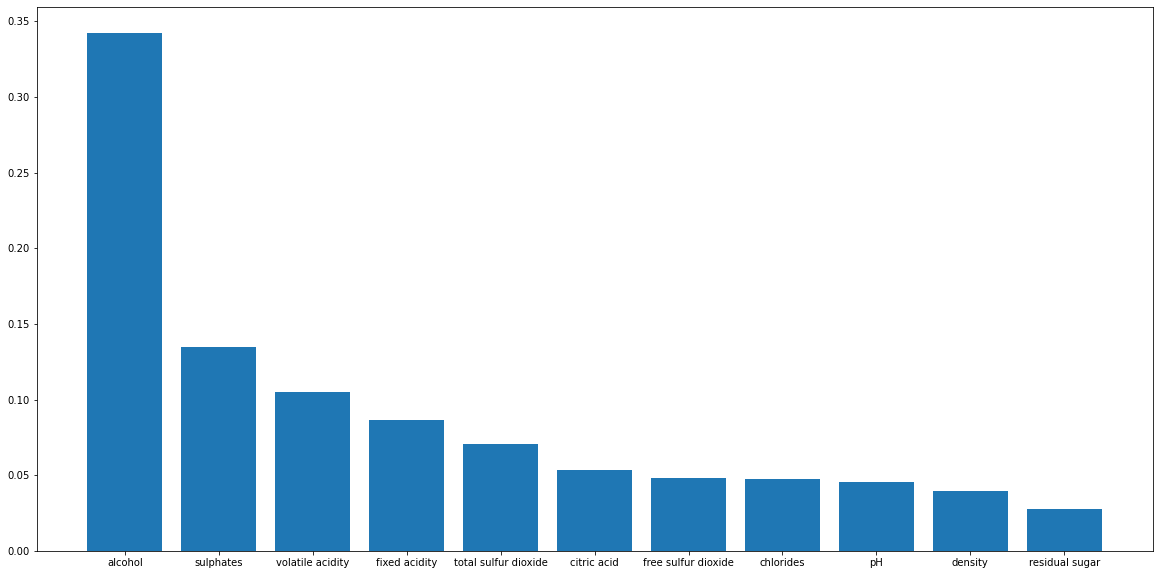

features with impact less than 0.05: 
                 zmienna   wartosc
6   free sulfur dioxide  0.047959
7             chlorides  0.047355
8                    pH  0.045265
9               density  0.039325
10       residual sugar  0.027714 

XGBClassifier


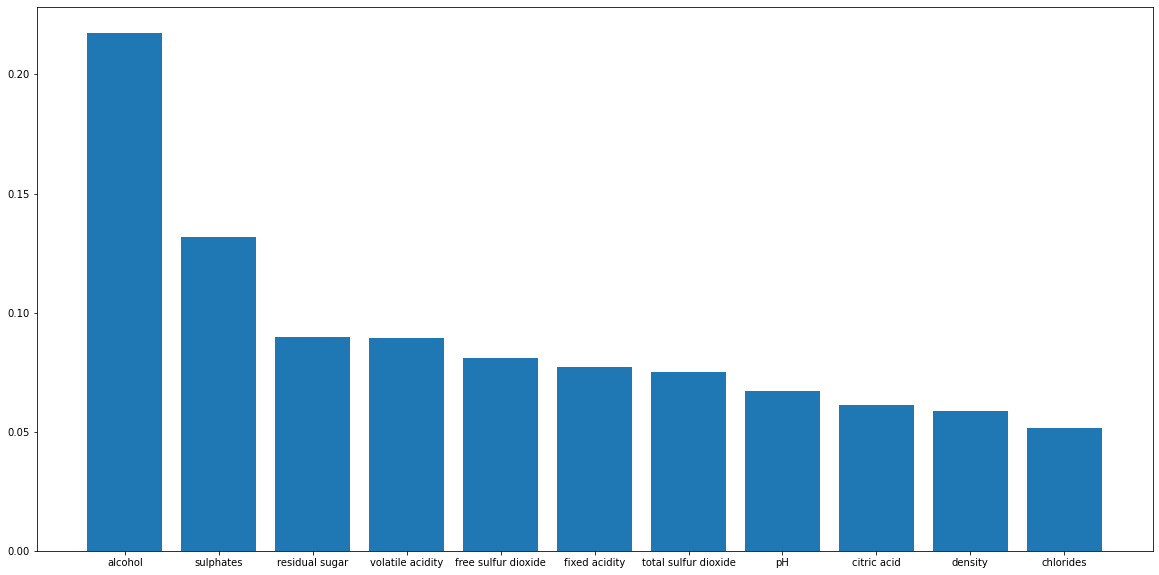

features with impact less than 0.05: 
 Empty DataFrame
Columns: [zmienna, wartosc]
Index: [] 

LogisticRegression


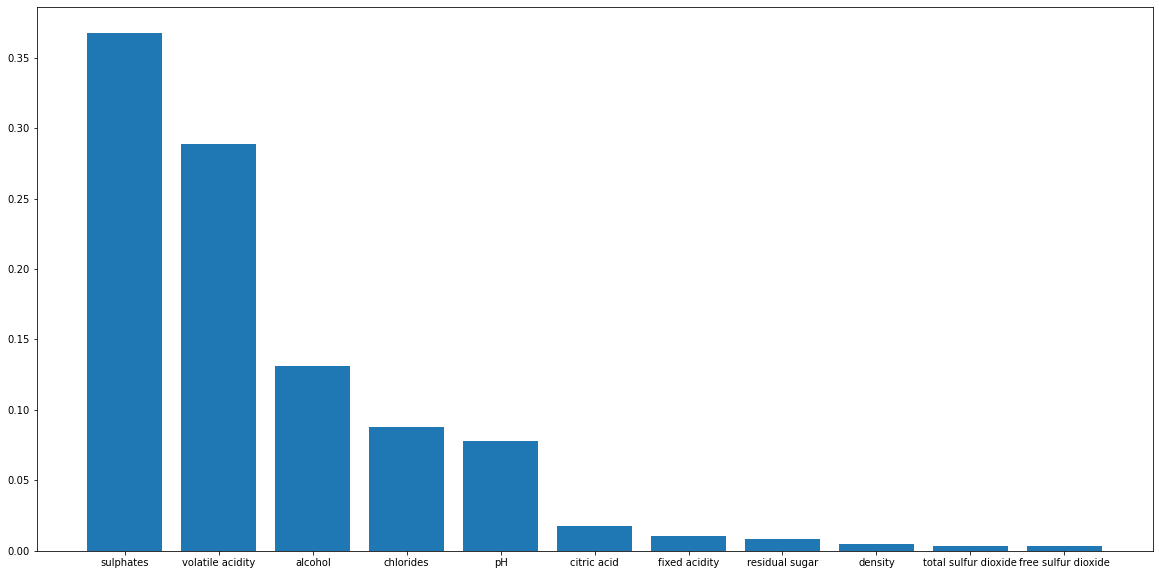

features with impact less than 0.05: 
                  zmienna   wartosc
5            citric acid  0.017726
6          fixed acidity  0.010442
7         residual sugar  0.008180
8                density  0.004854
9   total sulfur dioxide  0.003157
10   free sulfur dioxide  0.003086 



In [61]:
#sprawdzmy jakie zmienne sa najmniej istotne do przewidywania modelu i je mozemy pominac przy narzedziu
for i in lista_modeli:
    if i != model_lr:
        df = pd.DataFrame({"zmienna" :X.columns,"wartosc" : i.feature_importances_ }).sort_values(by = "wartosc", ascending = False).reset_index(drop = True)
    else:
         df = pd.DataFrame({"zmienna" :X.columns,"wartosc" : (np.abs(i.coef_)/(np.abs(i.coef_)).sum()).flatten()}).sort_values(by = "wartosc", ascending = False).reset_index(drop = True)
    print(type(i).__name__)
    plt.figure(figsize=(20,10))
    plt.bar(df.zmienna, df.wartosc)
    plt.show()
    print("features with impact less than 0.05:", "\n",df[df.wartosc<0.05], "\n")